In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

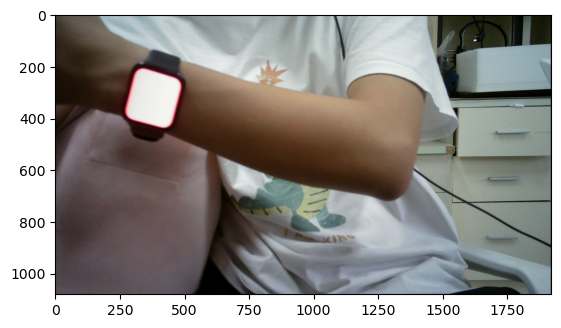

In [7]:
# 读取图片
img = cv.imread("./demo.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

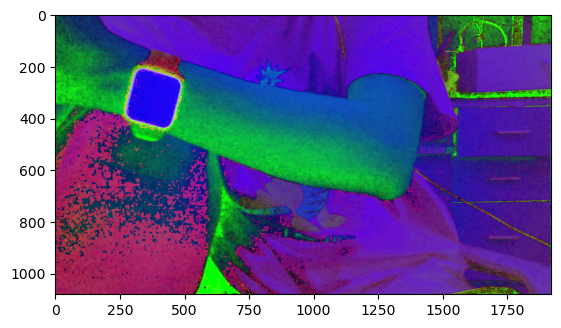

In [31]:
# 转换为HSV，对红色进行提取
hsv_img = cv.cvtColor(img,cv.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.show()

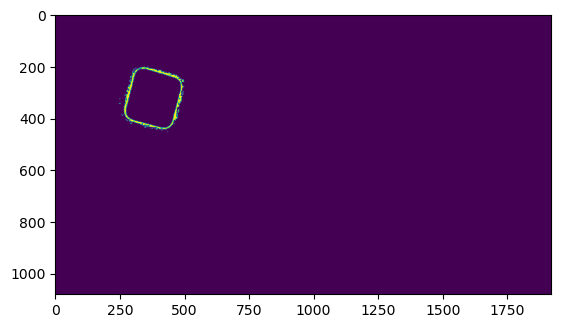

In [64]:
# 设置HSV的颜色
colorLow = np.array([156,150,46])
colorHigh = np.array([180,255,255])
mask_img = cv.inRange(hsv_img,colorLow,colorHigh)
# kernal = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
# mask = cv.morphologyEx(mask_img, cv.MORPH_CLOSE, kernal)
# mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernal)

plt.imshow(mask_img)
plt.show()

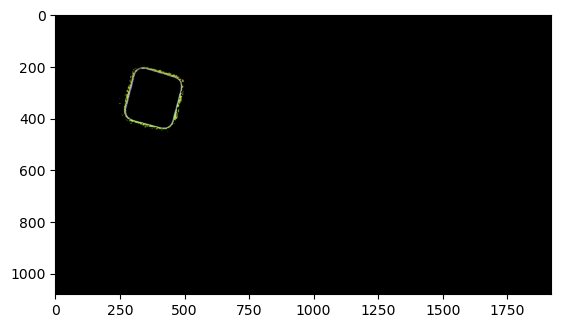

In [65]:
# 将mask的结果应用与HSV图片
result= cv.bitwise_and(hsv_img,hsv_img,mask=mask_img)
plt.imshow(result)
plt.show()

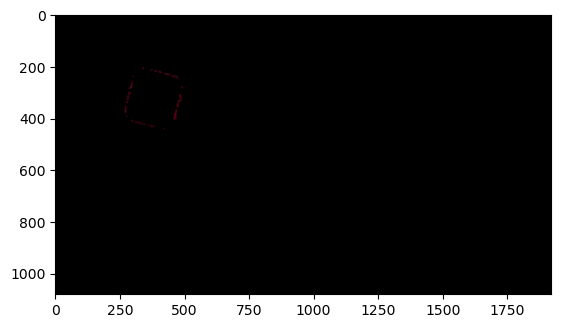

In [66]:
# 将处理后的结果转为RGB图像
back_rgb_img = cv.cvtColor(result,cv.COLOR_HSV2RGB)
kernel = np.ones((6,6),np.uint8)
back_rgb_img = cv.morphologyEx(back_rgb_img, cv.MORPH_OPEN, kernel)

plt.imshow(back_rgb_img)
plt.show()

41525.0 266 204 230 242
aaa


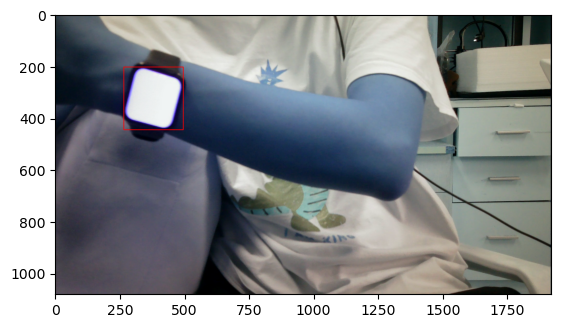

In [68]:
contours, hierarchy = cv.findContours(mask_img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours,hierarchy
backgroud_img = cv.imread("./demo.png")
backgroud_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    x,y,w,h = cv.boundingRect(contours[i])
    if area>500 and w>100 and h > 100:
        print(area,x,y,w,h)
        cv.rectangle(backgroud_img,(x,y),(x+w,y+h),(255,0,0),2)

print("aaa")
plt.imshow(backgroud_img)
plt.show()